# Capestone phase 3 and 4

Phase 3

1) Now make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA.

2) Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [3]:
File1=pd.read_csv("imbd1.csv")
File1

,Unnamed: 0,S.No.,Movie_Name,Duration,Year,Rating,Metascore,Director_1,Director_2,Director_3
0,0,1,Spider-Man: Across the Spider-Verse,140,2023,9.1,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson
1,1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
2,2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
495,495,496,Thor,115,2011,7.0,57,Kenneth Branagh,NaN,NaN
496,496,497,Underworld,121,2003,7.0,42,Len Wiseman,NaN,NaN
497,497,498,Independence Day,145,1996,7.0,59,Roland Emmerich,NaN,NaN
498,498,499,Ant-Man and the Wasp,118,2018,7.0,70,Peyton Reed,NaN,NaN


In [4]:
File2=pd.read_csv("imbd2.csv")
File2

,Unnamed: 0,Movie_Name,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Gross_Collection,Certification,votes
0,0,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"54,872"
1,1,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,720,281"
2,2,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,888,273"
3,3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,414,702"
4,4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,916,881"
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Thor,Chris Hemsworth,Anthony Hopkins,Natalie Portman,Tom Hiddleston,Action,Fantasy,Nan,181.03,PG-13,"869,417"
496,496,Underworld,Kate Beckinsale,Scott Speedman,Shane Brolly,Michael Sheen,Action,Fantasy,Thriller,51.97,R,"277,101"
497,497,Independence Day,Will Smith,Bill Pullman,Jeff Goldblum,Mary McDonnell,Action,Adventure,Sci-Fi,306.17,PG-13,"586,847"
498,498,Ant-Man and the Wasp,Paul Rudd,Evangeline Lilly,Michael Peña,Walton Goggins,Action,Adventure,Comedy,216.65,PG-13,"425,560"


In [5]:
File=pd.DataFrame()

In [6]:
File= pd.merge(File1, File2)
File

,Unnamed: 0,S.No.,Movie_Name,Duration,Year,Rating,Metascore,Director_1,Director_2,Director_3,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Gross_Collection,Certification,votes
0,0,1,Spider-Man: Across the Spider-Verse,140,2023,9.1,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"54,872"
1,1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,720,281"
2,2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,888,273"
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,414,702"
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,916,881"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,Thor,115,2011,7.0,57,Kenneth Branagh,NaN,NaN,Chris Hemsworth,Anthony Hopkins,Natalie Portman,Tom Hiddleston,Action,Fantasy,Nan,181.03,PG-13,"869,417"
496,496,497,Underworld,121,2003,7.0,42,Len Wiseman,NaN,NaN,Kate Beckinsale,Scott Speedman,Shane Brolly,Michael Sheen,Action,Fantasy,Thriller,51.97,R,"277,101"
497,497,498,Independence Day,145,1996,7.0,59,Roland Emmerich,NaN,NaN,Will Smith,Bill Pullman,Jeff Goldblum,Mary McDonnell,Action,Adventure,Sci-Fi,306.17,PG-13,"586,847"
498,498,499,Ant-Man and the Wasp,118,2018,7.0,70,Peyton Reed,NaN,NaN,Paul Rudd,Evangeline Lilly,Michael Peña,Walton Goggins,Action,Adventure,Comedy,216.65,PG-13,"425,560"


Lets drop the column Unnamed

In [7]:
File.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
File

,S.No.,Movie_Name,Duration,Year,Rating,Metascore,Director_1,Director_2,Director_3,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Gross_Collection,Certification,votes
0,1,Spider-Man: Across the Spider-Verse,140,2023,9.1,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"54,872"
1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,720,281"
2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,888,273"
3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,414,702"
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,916,881"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Thor,115,2011,7.0,57,Kenneth Branagh,NaN,NaN,Chris Hemsworth,Anthony Hopkins,Natalie Portman,Tom Hiddleston,Action,Fantasy,Nan,181.03,PG-13,"869,417"
496,497,Underworld,121,2003,7.0,42,Len Wiseman,NaN,NaN,Kate Beckinsale,Scott Speedman,Shane Brolly,Michael Sheen,Action,Fantasy,Thriller,51.97,R,"277,101"
497,498,Independence Day,145,1996,7.0,59,Roland Emmerich,NaN,NaN,Will Smith,Bill Pullman,Jeff Goldblum,Mary McDonnell,Action,Adventure,Sci-Fi,306.17,PG-13,"586,847"
498,499,Ant-Man and the Wasp,118,2018,7.0,70,Peyton Reed,NaN,NaN,Paul Rudd,Evangeline Lilly,Michael Peña,Walton Goggins,Action,Adventure,Comedy,216.65,PG-13,"425,560"


In [9]:
File.replace("Nan", np.nan, inplace=True)

In [10]:
File.isnull().sum()

S.No.                 0
Movie_Name            0
Duration              0
Year                  0
Rating                0
Metascore            78
Director_1            0
Director_2          456
Director_3          490
Star_1                0
Star_2                0
Star_3                0
Star_4                0
Genre_1               0
Genre_2               0
Genre_3              41
Gross_Collection     96
Certification         5
votes                 0
dtype: int64

Drop columns Director 2 and Director 3 maximum values are null.

In [11]:
File.drop(["Director_2","Director_3"], axis=1, inplace=True)

In [12]:
#using mode to fill null value.
File['Metascore']=File['Metascore'].fillna(File['Metascore'].mode()[0])
File['Certification'] = File['Certification'].fillna(File['Certification'].mode()[0])
File['Genre_3'] =File['Genre_3'].fillna(File['Genre_3'].mode()[0])

In [13]:
#Convert column Gross collection to float dataype and then used mean to fill null values
File['Gross_Collection'] = File['Gross_Collection'].astype(float)
File['Gross_Collection'] = File['Gross_Collection'].fillna(File['Gross_Collection'].mean())

In [14]:
File.isnull().sum().sum()

0

In [15]:
File.duplicated().sum()

0

In [16]:
File.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No.             500 non-null    int64  
 1   Movie_Name        500 non-null    object 
 2   Duration          500 non-null    int64  
 3   Year              500 non-null    int64  
 4   Rating            500 non-null    float64
 5   Metascore         500 non-null    object 
 6   Director_1        500 non-null    object 
 7   Star_1            500 non-null    object 
 8   Star_2            500 non-null    object 
 9   Star_3            500 non-null    object 
 10  Star_4            500 non-null    object 
 11  Genre_1           500 non-null    object 
 12  Genre_2           500 non-null    object 
 13  Genre_3           500 non-null    object 
 14  Gross_Collection  500 non-null    float64
 15  Certification     500 non-null    object 
 16  votes             500 non-null    object 
dt

# Let us perform EDA

In [17]:
File.columns

Index(['S.No.', 'Movie_Name', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director_1', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'Genre_1',
       'Genre_2', 'Genre_3', 'Gross_Collection', 'Certification', 'votes'],
      dtype='object')

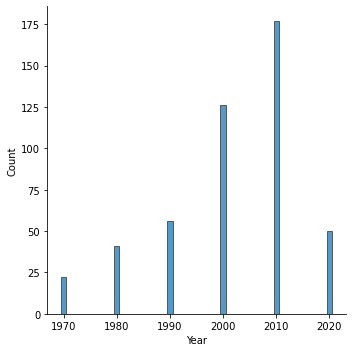

In [18]:
#year
sns.displot(pd.cut(File['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

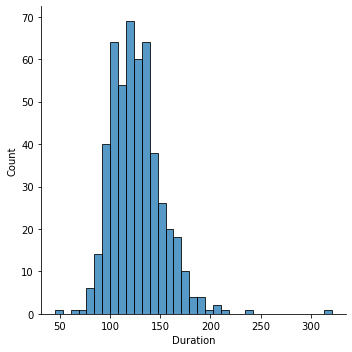

In [19]:
#duration
sns.displot(data=File, x="Duration",)

movies are mostly 90-120 minutes

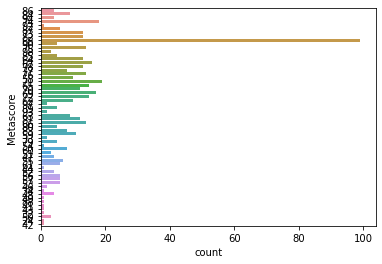

In [20]:
#Metascore
sns.countplot(y=File["Metascore"])
plt.show()

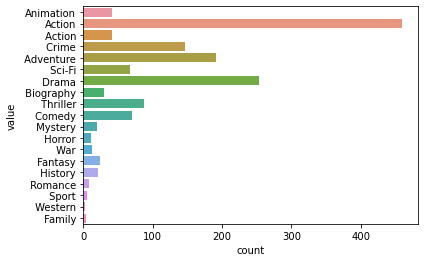

In [21]:
#genre
sns.countplot(data=pd.melt(File, value_vars=["Genre_1", "Genre_2", "Genre_3"]), y="value")
plt.show()

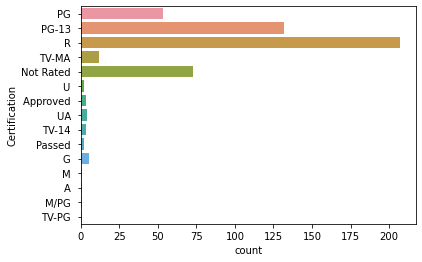

In [22]:
sns.countplot(y=File["Certification"])
plt.show()

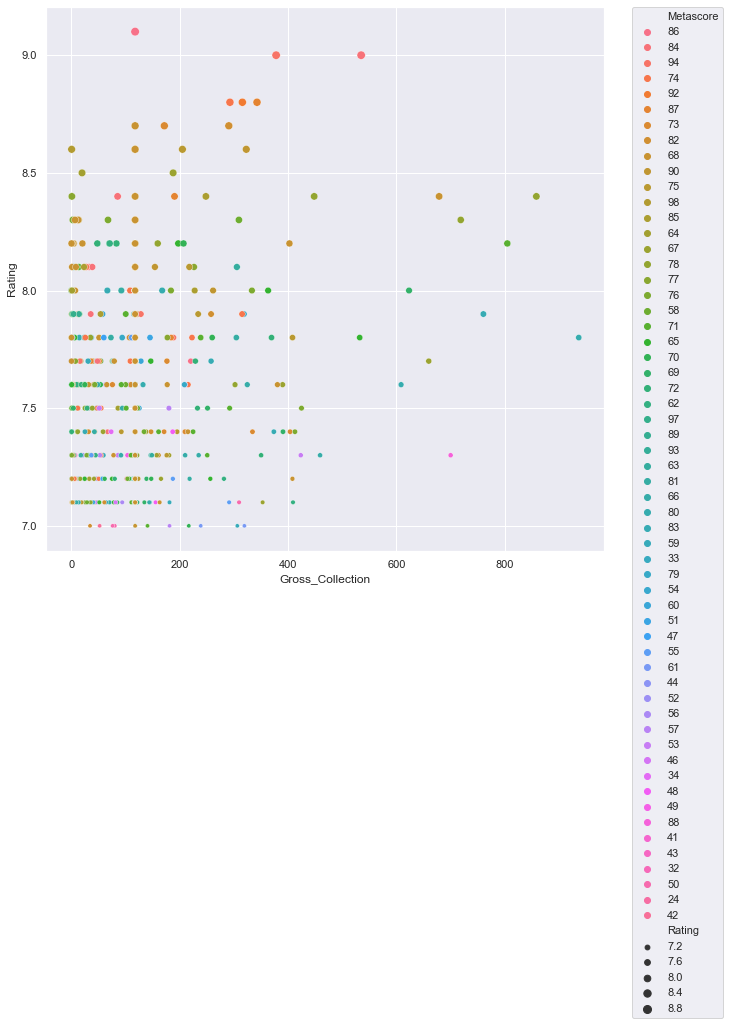

In [23]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Gross_Collection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=File)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Higher rated movies have been found to have higher gross collection.
-Even with high rating and metascore, movies have been found to be grossing below average

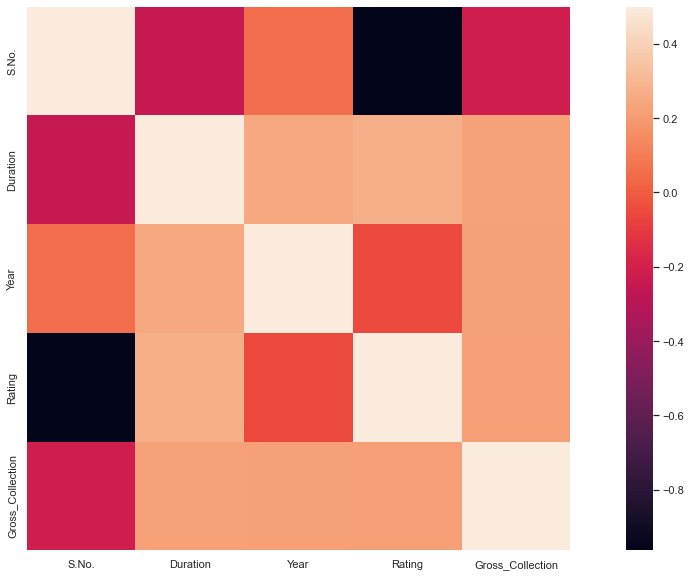

In [24]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(File.corr(), vmax=.5, square=True)
plt.show()

# MACHINE LEARNING

In [25]:
File.columns

Index(['S.No.', 'Movie_Name', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director_1', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'Genre_1',
       'Genre_2', 'Genre_3', 'Gross_Collection', 'Certification', 'votes'],
      dtype='object')

We ll bea dropping off Serial no and Movie names

In [26]:
File1=File.drop(["S.No.","Movie_Name"], axis=1)

In [27]:
#Encoding the categorical data
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
File1['Director_1']=le.fit_transform(File1['Director_1'])
File1['Star_1']=le.fit_transform(File1['Star_1'])
File1['Star_2']=le.fit_transform(File1['Star_2'])
File1['Star_3']=le.fit_transform(File1['Star_3'])
File1['Star_4']=le.fit_transform(File1['Star_4'])
File1['Genre_1']=le.fit_transform(File1['Genre_1'])
File1['Genre_2']=le.fit_transform(File1['Genre_2'])
File1['Genre_3']=le.fit_transform(File1['Genre_3'])
File1['Certification']=le.fit_transform(File1['Certification'])
File1['votes']=le.fit_transform(File1['votes'])
File1['Metascore']=le.fit_transform(File1['Metascore'])

In [28]:
File1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration          500 non-null    int64  
 1   Year              500 non-null    int64  
 2   Rating            500 non-null    float64
 3   Metascore         500 non-null    int32  
 4   Director_1        500 non-null    int32  
 5   Star_1            500 non-null    int32  
 6   Star_2            500 non-null    int32  
 7   Star_3            500 non-null    int32  
 8   Star_4            500 non-null    int32  
 9   Genre_1           500 non-null    int32  
 10  Genre_2           500 non-null    int32  
 11  Genre_3           500 non-null    int32  
 12  Gross_Collection  500 non-null    float64
 13  Certification     500 non-null    int32  
 14  votes             500 non-null    int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 57.2 KB


In [29]:
#using z score
z=np.abs(zscore(File1))
DF=File1[(z<3).all(axis=1)]
DF

,Duration,Year,Rating,Metascore,Director_1,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Gross_Collection,Certification,votes
3,148,2010,8.8,36,49,167,196,118,228,0,1,11,292.58,7,111
4,178,2001,8.8,53,207,75,160,318,382,0,1,4,315.54,7,22
5,179,2002,8.8,49,207,75,160,428,313,0,1,4,342.55,7,19
6,136,1999,8.7,35,159,152,225,67,141,0,9,4,171.48,9,23
7,124,1980,8.7,44,101,176,149,65,38,0,1,6,290.48,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,115,2011,7.0,19,151,48,35,302,422,0,6,4,181.03,7,477
496,121,2003,7.0,5,162,150,352,382,293,0,6,13,51.97,9,164
497,145,1996,7.0,21,244,306,50,186,281,0,1,11,306.17,7,382
498,118,2018,7.0,32,211,212,124,288,434,0,1,2,216.65,7,299


In [30]:
File1

,Duration,Year,Rating,Metascore,Director_1,Star_1,Star_2,Star_3,Star_4,Genre_1,Genre_2,Genre_3,Gross_Collection,Certification,votes
0,140,2023,9.1,48,123,250,145,57,258,1,0,0,117.485074,6,359
1,152,2008,9.0,46,49,51,152,1,289,0,4,4,534.860000,7,112
2,201,2003,9.0,55,207,75,398,163,313,0,1,4,377.850000,7,21
3,148,2010,8.8,36,49,167,196,118,228,0,1,11,292.580000,7,111
4,178,2001,8.8,53,207,75,160,318,382,0,1,4,315.540000,7,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,115,2011,7.0,19,151,48,35,302,422,0,6,4,181.030000,7,477
496,121,2003,7.0,5,162,150,352,382,293,0,6,13,51.970000,9,164
497,145,1996,7.0,21,244,306,50,186,281,0,1,11,306.170000,7,382
498,118,2018,7.0,32,211,212,124,288,434,0,1,2,216.650000,7,299


We are going to remove outlier

In [31]:
(500-426)*100/500

14.8

In [33]:
# Checking Skewness
DF.skew()

Duration            0.525000
Year               -1.081306
Rating              0.778600
Metascore          -0.183977
Director_1          0.013668
Star_1              0.001341
Star_2             -0.082641
Star_3             -0.010563
Star_4              0.014110
Genre_1             0.000000
Genre_2             0.919255
Genre_3             0.392026
Gross_Collection    1.360240
Certification      -0.531659
votes              -0.001198
dtype: float64

For remove skewness using power transform

In [34]:
from sklearn.preprocessing import power_transform

for i in DF.drop(["Gross_Collection","votes"],axis=1).columns:
    if abs(DF[f'{i}'].skew())>0.5:
        DF[[f'{i}']]=power_transform(DF[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Rating
treated skewness for : Genre_2
treated skewness for : Certification


In [35]:
DF.skew()

Duration            0.006490
Year               -0.463982
Rating              0.117812
Metascore          -0.183977
Director_1          0.013668
Star_1              0.001341
Star_2             -0.082641
Star_3             -0.010563
Star_4              0.014110
Genre_1             0.000000
Genre_2            -0.008876
Genre_3             0.392026
Gross_Collection    1.360240
Certification      -0.087624
votes              -0.001198
dtype: float64

# Model for gross collection

In [36]:
X=DF.drop(["Gross_Collection"],axis=1)
y=DF["Gross_Collection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [37]:
#random state prediction
LR = LinearRegression()

for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.23251313358106152
At random state 0, The test accuracy is :-0.1680751819697317


At random state 1, The training accuracy is :-0.23587957952226468
At random state 1, The test accuracy is :-0.1802915846894878


At random state 2, The training accuracy is :-0.2361469537501325
At random state 2, The test accuracy is :-0.15771427262535676


At random state 3, The training accuracy is :-0.24613916262663227
At random state 3, The test accuracy is :-0.14912126349764854


At random state 4, The training accuracy is :-0.2663981988734766
At random state 4, The test accuracy is :-0.08075294844125125


At random state 5, The training accuracy is :-0.2422875297181134
At random state 5, The test accuracy is :-0.1723594445056259


At random state 6, The training accuracy is :-0.18925216169511694
At random state 6, The test accuracy is :-0.25836719545942166


At random state 7, The training accuracy is :-0.2586070162011438
At random state 7, The test acc

In [38]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=42)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(285, 14) (285,)
(141, 14) (141,)


In [39]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 71.06207585996185
Mean Squared Error: 9370.883822404245
Root Mean Squared Error: 96.80332547182583
R squared score:  0.10077529822777576
Cross Validation Score is : [ 0.27148611 -0.01215992  0.03842816  0.1450726   0.20350587]
Mean Score : 0.12926656409224288
Difference : 0.028491265864467125


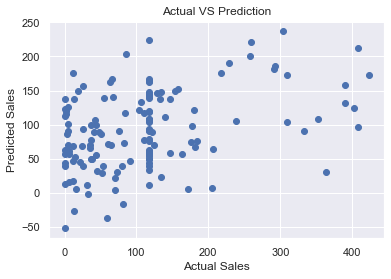

Scores for Lasso() are
Mean Absolute Error: 70.31386917257035
Mean Squared Error: 9257.999726197628
Root Mean Squared Error: 96.21849991658375
R squared score:  0.11160759213622573
Cross Validation Score is : [ 0.27039625 -0.00791457  0.06428123  0.14952084  0.2046973 ]
Mean Score : 0.13619621102445717
Difference : 0.02458861888823144


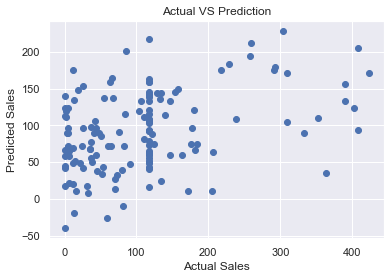

Scores for SVR() are
Mean Absolute Error: 73.58191040182989
Mean Squared Error: 10726.72110855807
Root Mean Squared Error: 103.56988514311517
R squared score:  -0.029330079493205208
Cross Validation Score is : [ 0.03124524 -0.05416923 -0.0529836  -0.18632199  0.02144136]
Mean Score : -0.04815764478924196
Difference : -0.018827565296036755


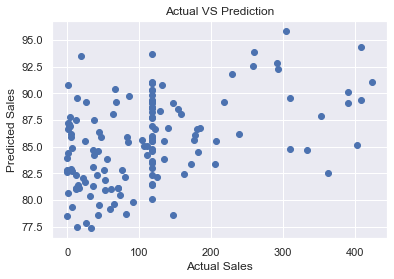

Scores for DecisionTreeRegressor() are
Mean Absolute Error: 77.08788497998735
Mean Squared Error: 11557.224879549893
Root Mean Squared Error: 107.50453422786359
R squared score:  -0.10902475076907048
Cross Validation Score is : [ 0.11383754 -0.82430106 -0.7275148  -0.19692958  0.11909515]
Mean Score : -0.3031625506908633
Difference : -0.1941377999217928


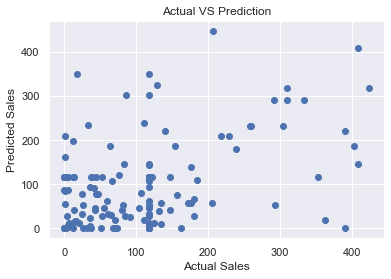

Scores for RandomForestRegressor() are
Mean Absolute Error: 55.470941938768355
Mean Squared Error: 5198.553614247161
Root Mean Squared Error: 72.10099593103524
R squared score:  0.5011497408342681
Cross Validation Score is : [0.54801418 0.11322118 0.15834834 0.31961823 0.44057042]
Mean Score : 0.31595446963477736
Difference : -0.18519527119949075


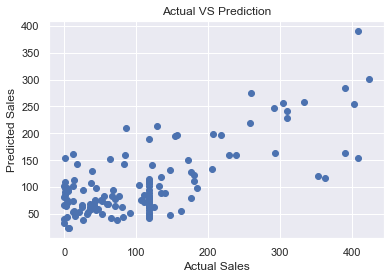

Scores for GradientBoostingRegressor() are
Mean Absolute Error: 57.20631940246763
Mean Squared Error: 5409.561202088904
Root Mean Squared Error: 73.54971925227794
R squared score:  0.48090157226824415
Cross Validation Score is : [0.57997386 0.05753699 0.08229693 0.38283707 0.49343296]
Mean Score : 0.3192155620570275
Difference : -0.16168601021121665


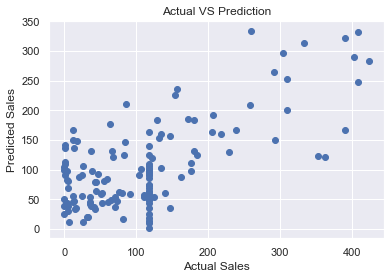

In [40]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()

Gradient booster gives best result

Hyperparameter tuning, and avoid underfitting or overfitting (bias/variance)

In [41]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [42]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[25,50,100],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[3,4]
}

In [43]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_depth': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

In [44]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.41304812896137677
The mean absolute error 59.67699797330981
root_mean_squared_error: 78.20912161706325


In [45]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [46]:
GB_l=joblib.load('gross_collection.obj')

# Model for votes

In [47]:
X=DF.drop(["votes"],axis=1)
y=DF["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

In [48]:
#random state prediction 
LR = LinearRegression()

for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.10215727131070962
At random state 0, The test accuracy is :-0.06388589770335762


At random state 1, The training accuracy is :0.09709747025747872
At random state 1, The test accuracy is :0.0012666630954357716


At random state 2, The training accuracy is :0.06237316586346697
At random state 2, The test accuracy is :0.00950194950772576


At random state 3, The training accuracy is :0.07382233459335441
At random state 3, The test accuracy is :0.042222540723994895


At random state 4, The training accuracy is :0.12148840673850603
At random state 4, The test accuracy is :-0.09009734104497547


At random state 5, The training accuracy is :0.0881215393057474
At random state 5, The test accuracy is :0.00018717313544980296


At random state 6, The training accuracy is :0.07252064156313887
At random state 6, The test accuracy is :0.021999613412596153


At random state 7, The training accuracy is :0.15217433415737225
At random state 7, The test acc

In [49]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=42)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(285, 14) (285,)
(141, 14) (141,)


Scores for LinearRegression() are
Mean Absolute Error: 123.12971008513834
Mean Squared Error: 21888.387483550443
Root Mean Squared Error: 147.94724560988098
R squared score:  -0.06637375514478094
Cross Validation Score is : [-0.08574699  0.02030385 -0.02047019 -0.07096981  0.07292788]
Mean Score : -0.016791053557177204
Difference : 0.049582701587603736


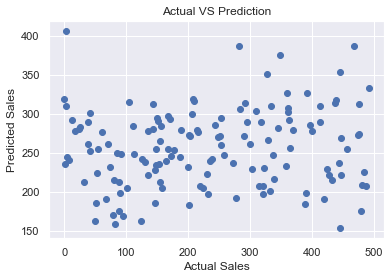

Scores for Lasso() are
Mean Absolute Error: 122.45864951639292
Mean Squared Error: 21558.63477673448
Root Mean Squared Error: 146.828589779833
R squared score:  -0.050308632371312445
Cross Validation Score is : [-0.07429197  0.02306728 -0.01792506 -0.05912922  0.07171801]
Mean Score : -0.011312194146999799
Difference : 0.038996438224312646


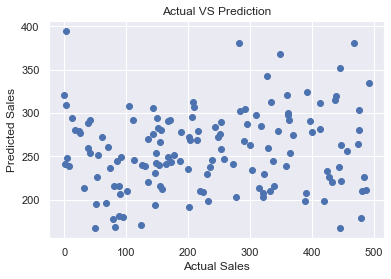

Scores for SVR() are
Mean Absolute Error: 126.78733256576098
Mean Squared Error: 21333.01764674204
Root Mean Squared Error: 146.05826798487664
R squared score:  -0.03931685939050977
Cross Validation Score is : [ 0.00135441 -0.08958661  0.00091479  0.00270197  0.00521077]
Mean Score : -0.015880935079958226
Difference : 0.023435924310551547


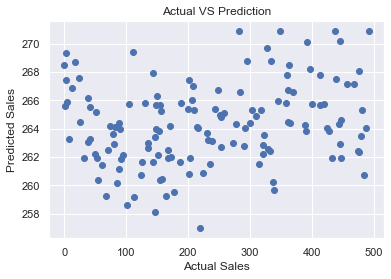

Scores for DecisionTreeRegressor() are
Mean Absolute Error: 158.2695035460993
Mean Squared Error: 40501.70212765958
Root Mean Squared Error: 201.2503469007186
R squared score:  -0.9731902233586558
Cross Validation Score is : [-0.70795796 -0.31930627 -0.93770923 -0.99666166 -1.19671821]
Mean Score : -0.8316706662199131
Difference : 0.14151955713874265


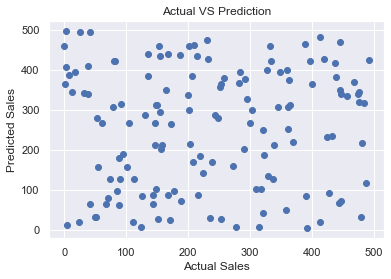

Scores for RandomForestRegressor() are
Mean Absolute Error: 110.92737588652481
Mean Squared Error: 18202.982821276597
Root Mean Squared Error: 134.91843025056508
R squared score:  0.1131743642354398
Cross Validation Score is : [ 0.07022276  0.01051915  0.0486899  -0.00197811  0.03858995]
Mean Score : 0.03320872731875681
Difference : -0.07996563691668299


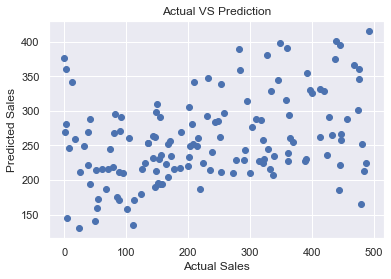

Scores for GradientBoostingRegressor() are
Mean Absolute Error: 115.89952122785823
Mean Squared Error: 19510.272176201845
Root Mean Squared Error: 139.67917588603478
R squared score:  0.049484928020912866
Cross Validation Score is : [-0.0872076  -0.06599334 -0.05588411 -0.32853473 -0.14671914]
Mean Score : -0.13686778611384662
Difference : -0.18635271413475948


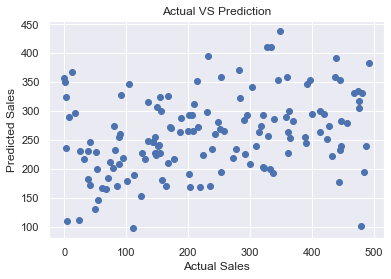

In [50]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()

Hyperparameter tuning, and avoid underfitting or overfitting (bias/variance)

In [51]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[25,50,100],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [52]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [53]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: -0.025923654139613284
The mean absolute error 126.00597955060856
root_mean_squared_error: 148.75538158719573
